In [16]:
# Import and set up
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns


In [17]:
# Load the dataset
dataset = pd.read_csv('data_train.csv')

X = dataset.drop(['Status', 'Id'], axis=1)
Y = dataset[['Status']]

In [18]:
# create testing and training data for RM variable
from sklearn.model_selection import train_test_split
trainX, subsetX, trainY, subsetY = train_test_split(np.array(X), np.array(Y), test_size=0.4)
validateX, testX, validateY, testY = train_test_split(np.array(subsetX), np.array(subsetY), test_size=0.5)

In [19]:
# Apply Polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainX)

polyX = scaler.transform(trainX)
poly_valid_X = scaler.transform(validateX)


In [20]:
# Establish the lambda values to test (grid)
lambda_paras = np.logspace(-7, 7, num=25)
# Define a threshold
threshold = 0.5  

# Lists to store performance metrics
train_performance = []
valid_performance = []

# Iterate over each lambda parameter
for lambda_para in lambda_paras:
    model = Ridge(alpha=lambda_para)
    
    # Train the model
    model.fit(polyX, trainY)        
    
    # Predict and calculate the train MSE
    train_pred = model.predict(polyX)

    # Convert predictions to binary
    train_pred = (train_pred >= threshold).astype(int)
    train_mse = mean_squared_error(trainY, train_pred)
    
    # Predict and calculate the validation MSE
    val_pred = model.predict(poly_valid_X)
    
    # Convert predictions to binary
    val_pred = (val_pred >= threshold).astype(int)
    val_mse = mean_squared_error(validateY, val_pred)
    
    # Append the performance metrics
    train_performance.append(train_mse)
    valid_performance.append(val_mse)


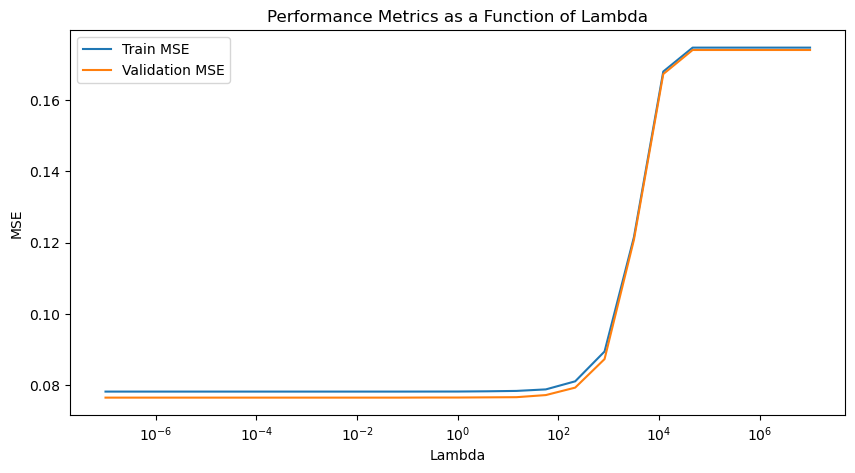

In [21]:
# Plot the f1 scores
plt.figure(figsize=(10, 5))
plt.semilogx(lambda_paras, train_performance, label='Train MSE')
plt.semilogx(lambda_paras, valid_performance, label='Validation MSE')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Performance Metrics as a Function of Lambda')
plt.legend()
plt.show()



In [22]:
# The value at lambda = 10^3 is the most compatible value, where the mean squared errors and their gap are the smallest
# Retrain the model with the chosen lambda

new_model = Ridge(alpha= 3)
    
# Train the model
new_model.fit(polyX, trainY)        

# Predict and calculate the train MSE
train_pred = new_model.predict(polyX)
train_mse = mean_squared_error(trainY, train_pred)

# Predict and calculate the validation MSE
val_pred = new_model.predict(poly_valid_X)
val_mse = mean_squared_error(validateY, val_pred)

print(train_mse)
print(val_mse)

0.08090293675280057
0.08058242886947571


In [27]:
# Predicting on test set
test_pred = model.predict(testX)
# Convert predictions to binary
test_pred = (test_pred >= threshold).astype(int)
# Calculate and print metrics
print("Test MSE:", mean_squared_error(testY, test_pred))

Test MSE: 0.179506762916061


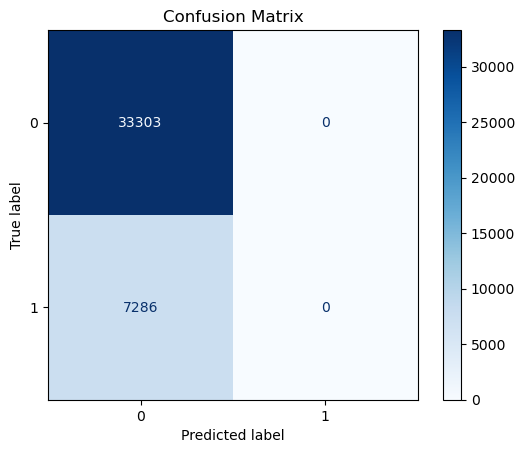

In [29]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(testY, test_pred)
# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()